Sparsity with L1 penalty: 79.50%
Test score with L1 penalty: 0.8401
Example run in 11.463 s


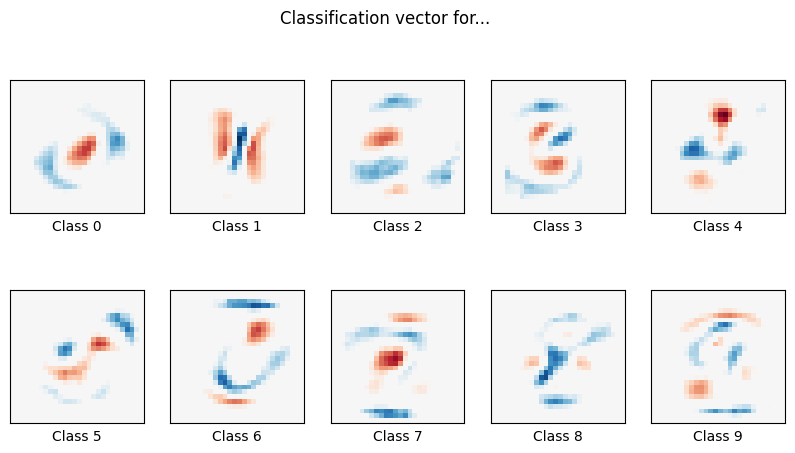

In [7]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [ ]:
"""
¿Cómo afecta la regularización L1 al rendimiento del modelo en la clasificación
de imágenes?
La regularización L1 ayuda a reducir la complejidad del modelo eliminando coeficientes 
innecesarios. En este caso, el modelo logra una precisión de prueba de 84.01%, lo cual
es un resultado sólido considerando la simplicidad del modelo. Aunque este rendimiento 
es bueno, sigue siendo inferior al que se podría obtener con modelos más complejos 
como redes neuronales o con penalización L2, que capturan mejor relaciones no lineales.
"""
"""
¿Qué ventajas tiene la regularización L1 en términos de interpretabilidad en 
la clasificación de imágenes?
Una gran ventaja de L1 es que hace que muchos pesos del modelo sean exactamente cero. 
En este experimento, el 79.50 % de los pesos son cero, lo que significa que el modelo 
solo usa una parte pequeña de los píxeles para tomar decisiones. Esto nos ayuda a ver
qué partes de la imagen son realmente importantes para clasificar cada número.
"""
"""
¿Cómo se compara la regularización L1 con la regularización L2 en la 
clasificación de imágenes?
L1 elimina completamente algunos pesos, haciendo el modelo más simple y más fácil 
de entender. En cambio, L2 mantiene todos los pesos pequeños, sin hacerlos cero. 
Aunque L1 es mejor para interpretar cómo funciona el modelo, L2 suele dar una mejor 
precisión porque puede captar más detalles en los datos.
"""
"""
¿Qué impacto tiene la regularización L1 en la capacidad del modelo para generalizar 
en la clasificación de imágenes?
L1 ayuda al modelo a generalizar mejor, es decir, a funcionar bien con datos nuevos,
porque evita que se ajuste demasiado a los datos de entrenamiento. Pero si se usa una 
regularización muy fuerte, puede que el modelo se vuelva demasiado simple y no 
capture bien toda la información importante, lo que puede afectar un poco su rendimiento.
"""
"""
¿Cómo podrías ajustar la fuerza de regularización para mejorar el rendimiento del 
modelo en la clasificación de imágenes?
Para encontrar el mejor equilibrio entre simplicidad y precisión, se puede probar 
con distintos valores del parámetro C, que controla qué tan fuerte es la regularización. 
Usar validación cruzada (probar varios modelos con diferentes valores de C) puede ayudar 
a encontrar el valor que da mejores resultados. También se puede probar una combinación 
de L1 y L2 (Elastic Net) para aprovechar lo mejor de ambos métodos.
"""